# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

# uses the load_dotenv function to grab our API key in the .env file
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# set monthly to 12,000
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
# Uses the request function to get the current price of BTC and put it in the Json format
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

# json.dumps converts from python object to a json string and indents the values we want and sorts them
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18746887,
            "id": 1,
            "last_updated": 1625315353,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 650975282987,
                    "percent_change_1h": 0.245515950595045,
                    "percent_change_24h": 5.29686399851499,
                    "percent_change_7d": 8.632099048061,
                    "percentage_change_1h": 0.245515950595045,
                    "percentage_change_24h": 5.29686399851499,
                    "percentage_change_7d": 8.632099048061,
                    "price": 34700.0,
                    "volume_24h": 24088316868
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18746887,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies": 12

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

# json.dumps converts from python object to a json string and indents the values we want and sorts them
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 116541756,
            "id": 1027,
            "last_updated": 1625315357,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 259695806361,
                    "percent_change_1h": 0.565962360816138,
                    "percent_change_24h": 9.24903475343092,
                    "percent_change_7d": 21.4839689396909,
                    "percentage_change_1h": 0.565962360816138,
                    "percentage_change_24h": 9.24903475343092,
                    "percentage_change_7d": 21.4839689396909,
                    "price": 2227.36,
                    "volume_24h": 21665662033
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116541756,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC

# steps through the json dictionaries to get to the value for the price key
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Displays the current price of BTC and formats it to two decimal places
print(f"The price of Bitcoin is ${btc_price:,.2f}")

The price of Bitcoin is $34,700.00


In [9]:
# Navigate the BTC response object to access the current price of ETH

# steps through the json dictionaries to get to the value for the price key
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Displays the current price of ETH and formats it to two decimal places
print(f"The price of Ethereum is ${eth_price:,.2f}")


The price of Ethereum is $2,227.36


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding

# multiplies the amount of coins held by the current price
btc_value = btc_coins * btc_price

# Display current value of your holding in BTC and formats it to two decimal places
print(f"Your current value of Bitcoin is ${btc_value:,.2f}")


Your current value of Bitcoin is $41,640.00


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Displays current value of your holding in ETH and formats it to two decimal places
print(f"Your current value of Ethereum is ${eth_value:,.2f}")



Your current value of Ethereum is $11,805.01


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Displays current cryptocurrency wallet balance and formats it to two decimal places
print(f"Your total cryptocurrency wallet balance is ${total_crypto_wallet:,.2f}")


Your total cryptocurrency wallet balance is $53,445.01


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Sets the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Checks the values were imported correctly by evaluating the type of each

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Creates the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Sets the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY","AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

# sets the start date
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
# sets the end date
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

# Get closing prices for SPY(stocks) and AGG(bonds)
portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Displays the first 5 rows of the Alpaca DataFrame
portfolio_prices_df.head()


AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_prices_df["AGG"]["close"])

# Displays the AGG closing price and type data
print(agg_close_price)
print(type(agg_close_price))


119.445
<class 'float'>


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_prices_df["SPY"]["close"])

# Displays the SPY closing price and type data
print(agg_close_price)
print(type(agg_close_price))

119.445
<class 'float'>


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculates the current value of the AGG bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Displays the current value of the bond portfolio and formats it to two decimal places
print(f"The current value of AGG bonds held is ${agg_value:,.2f}")


The current value of AGG bonds held is $23,889.00


In [20]:
# Calculates the current value of the SPY stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Displays the current value of the stock portfolio and formats it to two decimal places
print(f"The current value of SPY stock held is ${spy_value:,.2f}")


The current value of SPY stock held is $36,800.50


In [21]:
# Calculates the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Displays the current balance of the stock and bond portion of the portfolio and formats it to two decimal places
print(f"The total value of stocks and bonds in the portfolio is ${total_stocks_bonds:,.2f}")


The total value of stocks and bonds in the portfolio is $60,689.50


In [22]:
# Calculates the total value of the member's entire savings portfolio which includes the value of the cryptocurrency wallet and the value of the total of stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Displays the total current value of the cryptocurrency wallet and stocks and bonds added all together and formats it to two decimal places
print(f"The total amount in the entire savings portfolio is ${total_portfolio:,.2f}")

The total amount in the entire savings portfolio is $114,134.51


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Displays the Python list savings_data amounts
print(savings_data)
    

[53445.008, 60689.5]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["Amount"], index=["Crypto","Stocks & Bonds"])

# Display the savings_df DataFrame
savings_df

,Amount
Crypto,53445.008
Stocks & Bonds,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='Amount'>], dtype=object)

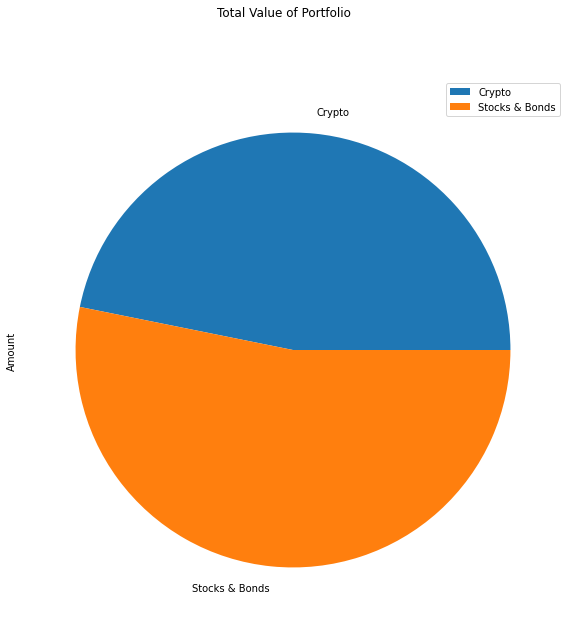

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# Displays the pie chart with amount on the y axis
savings_df.plot.pie(y="Amount",figsize=(10,10),title="Total Value of Portfolio",subplots=True)


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Creates the variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

# Walks through an if else statement to determine if the portfolio has enough money to move into the emergency fund.
if total_portfolio > emergency_fund_value:
    print("Congratulations you have enough money in your emergency fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations on reaching this important financial goal.")
else :
    print(f"You are ${emergency_fund_value - total_portfolio} away from reaching your goal.")


Congratulations you have enough money in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 

# Sets the start and end dates for both the bond and stock portion of the portfolio over the course of ten years this wouldn't return the full 10 year time frame.
# Had to split it into 3 dataframes to get the spand of 10 years used from the "ask the class" discussion
#start = pd.Timestamp("2011-07-03", tz="America/New_York").isoformat()
#end = pd.Timestamp("2021-07-03", tz="America/New_York").isoformat()
                                                    

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

# create my 3 dataframes for the 10 year period
start = pd.Timestamp("2011-07-03", tz="America/New_York").isoformat()
end = pd.Timestamp("2013-07-03", tz="America/New_York").isoformat()
ten_year_portfolio_df_one = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df

start = pd.Timestamp("2013-07-03", tz="America/New_York").isoformat()
end = pd.Timestamp("2017-07-03", tz="America/New_York").isoformat()
ten_year_portfolio_df_two = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df

start = pd.Timestamp("2017-07-03", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-07-03", tz="America/New_York").isoformat()
ten_year_portfolio_df_three = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit=1000
).df

# Set new variable to combine all three dataframes to show the data for the 10 year time frame
combined_ten_year_portfolio_df=ten_year_portfolio_df_one.append([ten_year_portfolio_df_two,ten_year_portfolio_df_three])

# Display both the first and last five rows of the DataFrame
display(combined_ten_year_portfolio_df.head())
display(combined_ten_year_portfolio_df.tail())

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2011-07-05 00:00:00-04:00  106.64  106.82  106.57  106.80   767342.0  133.78   
2011-07-06 00:00:00-04:00  106.79  106.93  106.76  106.87   717918.0  133.49   
2011-07-07 00:00:00-04:00  106.63  106.67  106.45  106.55  1249762.0  135.16   
2011-07-08 00:00:00-04:00  106.98  107.20  106.93  107.12   661425.0  133.82   
2011-07-11 00:00:00-04:00  107.34  107.54  107.25  107.44   578587.0  132.76   

                                                                
                             high     low   close       volume  
time                                                            
2011-07-05 00:00:00-04:00  134.08  133.39  133.78  140787252.0  
2011-07-06 00:00:00-04:00  134.14  133.11  133.96  119084271.0  
2011-07-07 00:00:00-04:00  135.70  134.88  135.40  125820939.0  
2011-07-08 00:00:00-04:00  134.44  133.39  134.41  139456296.0  
2011-07-11 00:00:00-04:00  133.18  131.66  131.99  153190139.0

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2021-06-28 00:00:00-04:00  115.04  115.23  115.040  115.160  5523690.0   
2021-06-29 00:00:00-04:00  115.06  115.25  115.045  115.250  3469405.0   
2021-06-30 00:00:00-04:00  115.36  115.45  115.300  115.350  5984381.0   
2021-07-01 00:00:00-04:00  115.15  115.19  115.010  115.115  4439326.0   
2021-07-02 00:00:00-04:00  115.23  115.37  115.170  115.370  4219494.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2021-06-28 00:00:00-04:00  427.17  427.65  425.8900  427.48  43937373.0  
2021-06-29 00:00:00-04:00  427.89  428.56  427.1300  427.68  32097572.0  
2021-06-30 00:00:00-04:00  427.20  428.78  427.1800  428.08  46776402.0  
2021-07-01 00:00:00-04:00  428.83  430.60  428.8000  430.47  44147835.0  
2021-07-02 00:00:00-04:00  431.67  434.10  430.5218  433.75  46557070.0

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

# configures the Monte Carlo simulatoin with the parameters passed in
mc_thirtyyear = MCSimulation(
    portfolio_data = combined_ten_year_portfolio_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Shows the simulation input data for 30 year time period
mc_thirtyyear.portfolio_data


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2011-07-05 00:00:00-04:00  106.64  106.82  106.570  106.800   767342.0   
2011-07-06 00:00:00-04:00  106.79  106.93  106.760  106.870   717918.0   
2011-07-07 00:00:00-04:00  106.63  106.67  106.450  106.550  1249762.0   
2011-07-08 00:00:00-04:00  106.98  107.20  106.930  107.120   661425.0   
2011-07-11 00:00:00-04:00  107.34  107.54  107.250  107.440   578587.0   
...                           ...     ...      ...      ...        ...   
2021-06-28 00:00:00-04:00  115.04  115.23  115.040  115.160  5523690.0   
2021-06-29 00:00:00-04:00  115.06  115.25  115.045  115.250  3469405.0   
2021-06-30 00:00:00-04:00  115.36  115.45  115.300  115.350  5984381.0   
2021-07-01 00:00:00-04:00  115.15  115.19  115.010  115.115  4439326.0   
2021-07-02 00:00:00-04:00  115.23  115.37  115.170  115.370  4219494.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2011-07-05 00:00:00-04:00          NaN  133.78  134.08  133.3900  133.78   
2011-07-06 00:00:00-04:00     0.000655  133.49  134.14  133.1100  133.96   
2011-07-07 00:00:00-04:00    -0.002994  135.16  135.70  134.8800  135.40   
2011-07-08 00:00:00-04:00     0.005350  133.82  134.44  133.3900  134.41   
2011-07-11 00:00:00-04:00     0.002987  132.76  133.18  131.6600  131.99   
...                                ...     ...     ...       ...     ...   
2021-06-28 00:00:00-04:00     0.002350  427.17  427.65  425.8900  427.48   
2021-06-29 00:00:00-04:00     0.000782  427.89  428.56  427.1300  427.68   
2021-06-30 00:00:00-04:00     0.000868  427.20  428.78  427.1800  428.08   
2021-07-01 00:00:00-04:00    -0.002037  428.83  430.60  428.8000  430.47   
2021-07-02 00:00:00-04:00     0.002215  431.67  434.10  430.5218  433.75   

                                                     
                                volume daily_return  
time                                                 
2011-07-05 00:00:00-04:00  140787252.0          NaN  
2011-07-06 00:00:00-04:00  119084271.0     0.001345  
2011-07-07 00:00:00-04:00  125820939.0     0.010749  
2011-07-08 00:00:00-04:00  139456296.0    -0.007312  
2011-07-11 00:00:00-04:00  153190139.0    -0.018005  
...                                ...          ...  
2021-06-28 00:00:00-04:00   43937373.0     0.002133  
2021-06-29 00:00:00-04:00   32097572.0     0.000468  
2021-06-30 00:00:00-04:00   46776402.0     0.000935  
2021-07-01 00:00:00-04:00   44147835.0     0.005583  
2021-07-02 00:00:00-04:00   46557070.0     0.007620  

[2504 rows x 12 columns]

In [31]:
# Runs the Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997995,0.996068,1.008063,0.996633,0.992475,0.996205,1.001272,1.002099,1.004208,0.995354,...,1.004078,0.998172,1.008224,0.998161,1.017753,1.013573,1.014653,0.998101,0.987772,1.012053
2,1.000652,0.990350,1.017741,0.979628,0.997394,0.994768,0.996527,0.997618,1.016516,1.005507,...,0.996201,1.008827,1.015709,0.977979,1.015544,1.022999,1.003141,0.997104,0.987444,1.016967
3,1.012831,0.990021,1.016428,0.960224,1.003463,0.993973,0.996683,1.001076,1.022678,1.003042,...,0.998734,1.006731,1.023069,0.981712,1.020304,1.025053,1.002884,0.989507,0.989961,1.016426
4,1.012256,0.995516,1.016704,0.954825,0.994025,0.999417,1.002276,1.009665,1.014217,1.004285,...,0.997523,1.007057,1.020698,0.989739,1.040175,1.015236,1.012399,0.988259,0.998827,1.014474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.513548,17.481339,15.416049,11.386005,7.183641,17.268779,15.443120,7.551374,11.098425,12.996322,...,23.102788,4.694273,10.630178,18.557197,27.223861,17.355728,7.848085,4.531121,4.460013,8.834492
7557,8.603474,17.473074,15.320547,11.473830,7.174547,17.289085,15.440722,7.516708,11.117584,13.001286,...,23.323864,4.713035,10.690617,18.587333,27.012644,17.372732,7.803682,4.502501,4.423476,8.787750
7558,8.568997,17.530954,15.346878,11.325459,7.134710,17.428030,15.600754,7.504069,10.982898,13.049234,...,23.463673,4.706673,10.708162,18.528731,27.356911,17.451434,7.754191,4.430951,4.466177,8.819602
7559,8.644619,17.589621,15.422577,11.262888,7.157330,17.417979,15.597994,7.454894,10.926147,13.075479,...,23.483915,4.682993,10.767380,18.688785,27.368371,17.451561,7.772858,4.436983,4.467081,8.750087


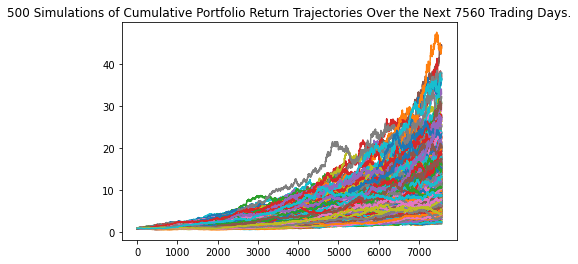

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

# Displays the overlay line plot of the Monte Carlo simulation over 30 years
mc_sim_line_plot = mc_thirtyyear.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

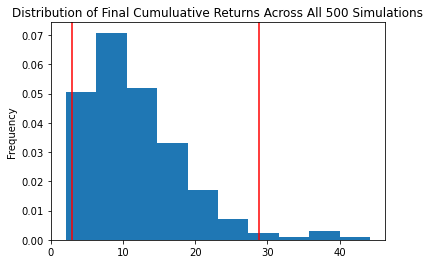

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# Displays the histogram probability distrubution over 30 years
mc_sim_dist_plot = mc_thirtyyear.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mc_thirty_year_summary_statistics = mc_thirtyyear.summarize_cumulative_return()


# Displays the 30-year Monte Carlo summary statistics
print(mc_thirty_year_summary_statistics)

count           500.000000
mean             11.756268
std               6.877514
min               2.103416
25%               6.778281
50%              10.379085
75%              15.389919
max              44.208718
95% CI Lower      3.028293
95% CI Upper     28.799712
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio

print(f"The current balance of the stocks and bonds in the portfolio is ${total_stocks_bonds:,.2f}")

The current balance of the stocks and bonds in the portfolio is $60,689.50


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_thirty_year_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_thirty_year_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:,.2f} in the portfolio"
    f" invested 40% AGG and 60% SPY weighted over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: ,.2f} and ${ci_upper_thirty_cumulative_return: ,.2f}.")


There is a 95% chance that an initial investment of $60,689.50 in the portfolio invested 40% AGG and 60% SPY weighted over the next 30 years will end within in the range of $ 183,785.61 and $ 1,747,840.13.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
mc_tenyear = MCSimulation(
    portfolio_data = combined_ten_year_portfolio_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Shows the simulation input data for 10 year time period
mc_tenyear.portfolio_data


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2011-07-05 00:00:00-04:00  106.64  106.82  106.570  106.800   767342.0   
2011-07-06 00:00:00-04:00  106.79  106.93  106.760  106.870   717918.0   
2011-07-07 00:00:00-04:00  106.63  106.67  106.450  106.550  1249762.0   
2011-07-08 00:00:00-04:00  106.98  107.20  106.930  107.120   661425.0   
2011-07-11 00:00:00-04:00  107.34  107.54  107.250  107.440   578587.0   
...                           ...     ...      ...      ...        ...   
2021-06-28 00:00:00-04:00  115.04  115.23  115.040  115.160  5523690.0   
2021-06-29 00:00:00-04:00  115.06  115.25  115.045  115.250  3469405.0   
2021-06-30 00:00:00-04:00  115.36  115.45  115.300  115.350  5984381.0   
2021-07-01 00:00:00-04:00  115.15  115.19  115.010  115.115  4439326.0   
2021-07-02 00:00:00-04:00  115.23  115.37  115.170  115.370  4219494.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2011-07-05 00:00:00-04:00          NaN  133.78  134.08  133.3900  133.78   
2011-07-06 00:00:00-04:00     0.000655  133.49  134.14  133.1100  133.96   
2011-07-07 00:00:00-04:00    -0.002994  135.16  135.70  134.8800  135.40   
2011-07-08 00:00:00-04:00     0.005350  133.82  134.44  133.3900  134.41   
2011-07-11 00:00:00-04:00     0.002987  132.76  133.18  131.6600  131.99   
...                                ...     ...     ...       ...     ...   
2021-06-28 00:00:00-04:00     0.002350  427.17  427.65  425.8900  427.48   
2021-06-29 00:00:00-04:00     0.000782  427.89  428.56  427.1300  427.68   
2021-06-30 00:00:00-04:00     0.000868  427.20  428.78  427.1800  428.08   
2021-07-01 00:00:00-04:00    -0.002037  428.83  430.60  428.8000  430.47   
2021-07-02 00:00:00-04:00     0.002215  431.67  434.10  430.5218  433.75   

                                                     
                                volume daily_return  
time                                                 
2011-07-05 00:00:00-04:00  140787252.0          NaN  
2011-07-06 00:00:00-04:00  119084271.0     0.001345  
2011-07-07 00:00:00-04:00  125820939.0     0.010749  
2011-07-08 00:00:00-04:00  139456296.0    -0.007312  
2011-07-11 00:00:00-04:00  153190139.0    -0.018005  
...                                ...          ...  
2021-06-28 00:00:00-04:00   43937373.0     0.002133  
2021-06-29 00:00:00-04:00   32097572.0     0.000468  
2021-06-30 00:00:00-04:00   46776402.0     0.000935  
2021-07-01 00:00:00-04:00   44147835.0     0.005583  
2021-07-02 00:00:00-04:00   46557070.0     0.007620  

[2504 rows x 12 columns]

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
mc_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989957,1.003214,1.013666,1.015163,0.988445,0.985613,0.996204,1.008375,0.985000,1.000284,...,1.010535,1.006865,0.995863,1.005454,1.004697,0.995064,0.993973,0.989647,0.995576,1.007596
2,0.987822,1.013251,1.025563,1.017369,0.993699,0.998196,1.008572,1.008902,0.978494,1.008503,...,1.001482,1.003073,1.001520,1.006670,1.006792,0.988201,0.997831,0.986717,0.991812,1.017378
3,0.990603,1.021027,1.013354,1.021107,1.017819,0.996710,1.014320,1.009850,0.982237,0.999147,...,0.998711,1.003306,1.014315,1.013269,1.015087,1.003342,1.001575,1.009906,0.996436,1.017338
4,0.995840,1.020315,1.015991,1.018392,1.028090,1.005503,1.021082,1.015377,0.995757,1.001960,...,1.005948,0.995177,1.032609,1.014209,1.008253,1.006592,1.012033,0.994131,1.008216,1.024574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.920063,1.405332,1.602466,3.686815,5.979818,3.346050,1.955338,4.845157,2.253837,6.783014,...,2.440745,3.573669,4.340265,3.680843,2.072679,1.992233,3.440978,3.042949,4.102322,2.859715
2517,1.930235,1.406767,1.608861,3.690835,6.007948,3.282262,1.933783,4.854957,2.236933,6.824881,...,2.445268,3.560259,4.308828,3.692539,2.103907,2.018946,3.407536,3.022600,4.058342,2.845687
2518,1.958163,1.429227,1.620884,3.669804,6.051603,3.318287,1.939977,4.898940,2.244445,6.856602,...,2.450518,3.570166,4.301329,3.739500,2.071374,2.019455,3.438396,3.039970,3.989221,2.794736
2519,1.931324,1.419945,1.641794,3.713007,6.069577,3.297844,1.918616,4.921225,2.236995,6.889576,...,2.490285,3.562448,4.310438,3.761690,2.064284,2.029093,3.398444,3.051782,3.963457,2.798533


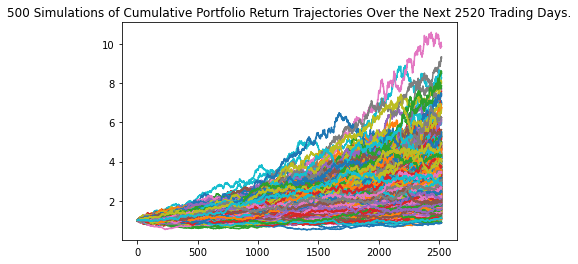

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_sim_line_plot = mc_tenyear.plot_simulation()


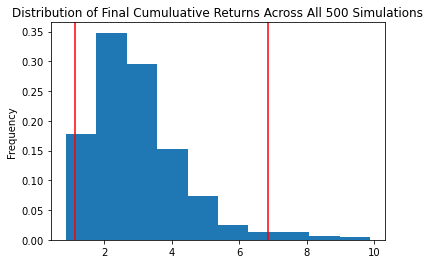

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_sim_dist_plot = mc_tenyear.plot_distribution()

In [47]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

mc_ten_year_summary_statistics = mc_tenyear.summarize_cumulative_return()


# Displays the 10-year Monte Carlo summary statistics
print(mc_ten_year_summary_statistics)

count           500.000000
mean              3.021752
std               1.416811
min               0.862209
25%               2.011047
50%               2.744063
75%               3.608134
max               9.882994
95% CI Lower      1.145913
95% CI Upper      6.844767
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [48]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stocks and bonds in the portfolio is ${total_stocks_bonds:,.2f}")


The current balance of the stocks and bonds in the portfolio is $60,689.50


In [49]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_ten_year_summary_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_ten_year_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:,.2f} in the portfolio"
    f" invested 20% AGG and 80% SPY weighted over the next 30 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return: ,.2f} and ${ci_upper_ten_cumulative_return: ,.2f}.")


There is a 95% chance that an initial investment of $60,689.50 in the portfolio invested 20% AGG and 80% SPY weighted over the next 30 years will end within in the range of $ 69,544.86 and $ 415,405.51.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?